<a href="https://colab.research.google.com/github/mojanshadkar/2023_ML_EES/blob/main/Final_project_Water_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
df = pd.read_csv('/content/drive/MyDrive/thesis/waterQuality1.csv')
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [5]:
df.shape

(7999, 21)

In [6]:
# Convert non-numeric columns to numeric (if possible)
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        except ValueError:
            print(f"Column '{col}' cannot be converted to numeric.")
    # Drop rows with NaN values in the specified column
    df.dropna(subset=['ammonia'], inplace=True)

# Check data types after conversion
print(df.dtypes)

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe          int64
dtype: object


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [8]:
counts = df.is_safe.value_counts()
counts

0    7084
1     912
Name: is_safe, dtype: int64

In [9]:
water_data = df.copy()
# Assuming water_data is your DataFrame after replacements

# Remove rows with missing target values
#water_data = water_data.dropna(subset=[water_data.columns[-1]])

# Now, separate the features and the labels
X = water_data.iloc[:, :-1]  # Features (all columns except the last one)
y = water_data.iloc[:, -1]   # Target variable (last column)

# Ensure the features (`X`) are numeric for imputation
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Handle missing values in features
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy='mean')
#X = imputer.fit_transform(X)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





In [10]:
# Import the necessary classes and functions
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# 1. Define hyperparameter search grid
param_grid = {'max_leaf_nodes':range(2, 121),'min_samples_split': range(2, 11)}
#2.GridSearch
gsc_tree = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid,cv=3,verbose=1)
# 3. Fit on training set

gsc_tree.fit(X_train,y_train)



Fitting 3 folds for each of 1071 candidates, totalling 3213 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': range(2, 121),
                         'min_samples_split': range(2, 11)},
             verbose=1)

In [11]:
best_dt = gsc_tree.best_estimator_
best_dt

DecisionTreeClassifier(max_leaf_nodes=32, min_samples_split=8, random_state=42)

In [12]:
# Make predictions on the training and test sets with my best model
y_pred_train = gsc_tree.predict(X_train)
y_pred_test = gsc_tree.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
print(f'Accuracy over training set: {(accuracy_score(y_train,y_pred_train)):.2%} \n'
f'Accuracy over test set: {(accuracy_score(y_test,y_pred_test)):.2%}')

Accuracy over training set: 96.26% 
Accuracy over test set: 95.12%


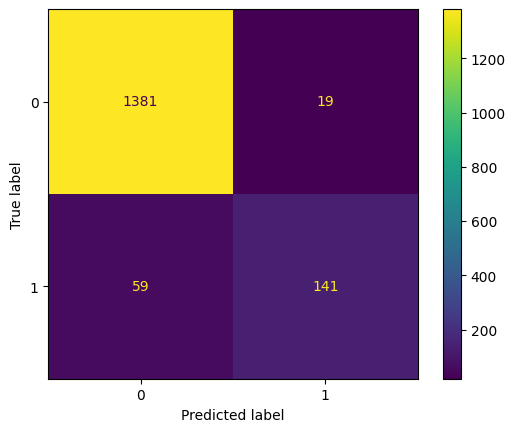

In [14]:
# Make predictions on the test set with your best model
best_model = gsc_tree.best_estimator_
y_pred_test = best_model.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()

Feature importances from the best Decision Tree model:
        Feature  Importance
4       cadmium    0.286984
0     aluminium    0.244950
15  perchlorate    0.189748
1       ammonia    0.064203
19      uranium    0.056379
12     nitrates    0.042739
18       silver    0.024181
9      bacteria    0.021666
16       radium    0.016528
13     nitrites    0.014025
11         lead    0.012112
7        copper    0.007659
17     selenium    0.007602
14      mercury    0.006795
10      viruses    0.004427
5    chloramine    0.000000
6      chromium    0.000000
8      flouride    0.000000
3        barium    0.000000
2       arsenic    0.000000


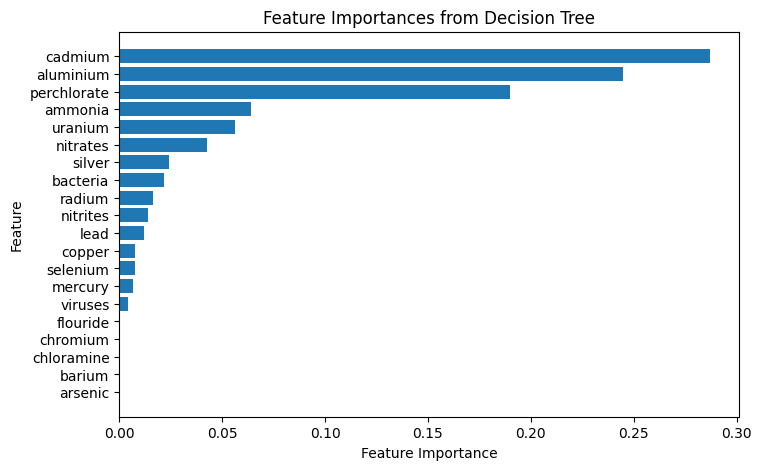

In [15]:
# Get feature importances from the best Decision Tree model found by GridSearchCV

feature_importances = best_dt.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_names = water_data.columns[:-1]  # Assuming last column is the target variable, adjust as necessary
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame to show the most important features at the top
importances_df.sort_values(by='Importance', ascending=False, inplace=True)

# Display the feature importance DataFrame
print("Feature importances from the best Decision Tree model:")
print(importances_df)


# Assuming 'feature_importances' and 'feature_names' are already defined using the best Decision Tree model

# Sort the features by importance
sorted_idx = feature_importances.argsort()

# Plot the feature importances
plt.figure(figsize=(8, 5))  # Adjust the size as needed
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree')
plt.show()

In [16]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Assuming X_train and y_train are already defined and preprocessed
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
# Get feature importances from the random forest model
importances = rf.feature_importances_
# Evaluate the Random Forest's performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_predictions))
# Get the column names (feature names)
feature_names = water_data.columns[:-1]  # Assuming last column is target

# Create a DataFrame to display importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame to show the most important features at the top
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(importance_df)

Random Forest Accuracy: 0.960625
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1400
           1       0.97      0.70      0.82       200

    accuracy                           0.96      1600
   macro avg       0.97      0.85      0.90      1600
weighted avg       0.96      0.96      0.96      1600

        Feature  Importance
0     aluminium    0.203056
4       cadmium    0.116255
15  perchlorate    0.112092
2       arsenic    0.063197
1       ammonia    0.049731
5    chloramine    0.048406
18       silver    0.047536
12     nitrates    0.040542
13     nitrites    0.034229
16       radium    0.033760
19      uranium    0.032458
6      chromium    0.031368
10      viruses    0.030998
3        barium    0.027899
9      bacteria    0.027095
7        copper    0.024421
11         lead    0.023977
8      flouride    0.021092
17     selenium    0.018210
14      mercury    0.013677


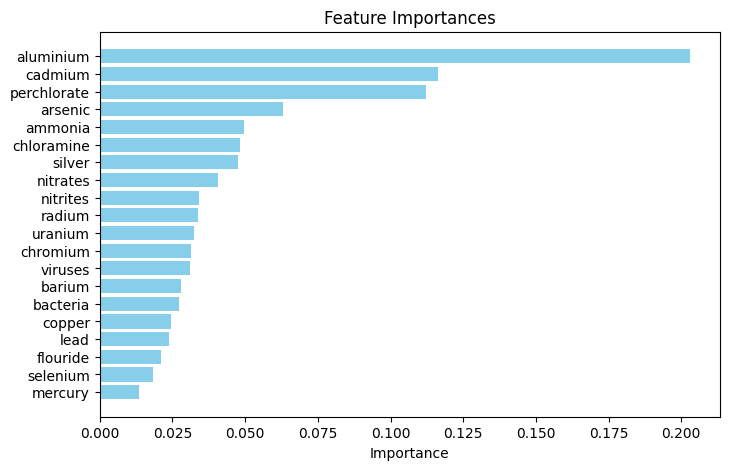

In [32]:
import matplotlib.pyplot as plt

# Assuming importance_df is defined

# Plotting the feature importances
plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


In [18]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfcopt = RandomForestClassifier()
n_estimators = []
for i in np.arange(100,501,50):
  n_estimators.append(int(i))
param_grid = {'n_estimators': n_estimators,
              'max_features': [2,3,4,5]}
clf = HalvingGridSearchCV(rfcopt,param_grid,
                              max_resources=2000,
                              random_state=42)
clf.fit(X_train, y_train)
best_grid = clf.best_params_
print('best parameters:',best_grid)

best parameters: {'max_features': 5, 'n_estimators': 500}


In [19]:
rfcopt=RandomForestClassifier(max_features= 5, n_estimators= 500)
rfcopt.fit(X_train,y_train)
rfcopt_predict = rfcopt.predict(X_test)
rfcopt_accuracy = accuracy_score(y_test, rfcopt_predict)

print('The accuracy of improved RandomForestClassifier:',"%.3f" %rfcopt_accuracy)
print('The accuracy of basic RandomForestClassifier:',"%.3f" %rf_accuracy)


The accuracy of improved RandomForestClassifier: 0.966
The accuracy of basic RandomForestClassifier: 0.961


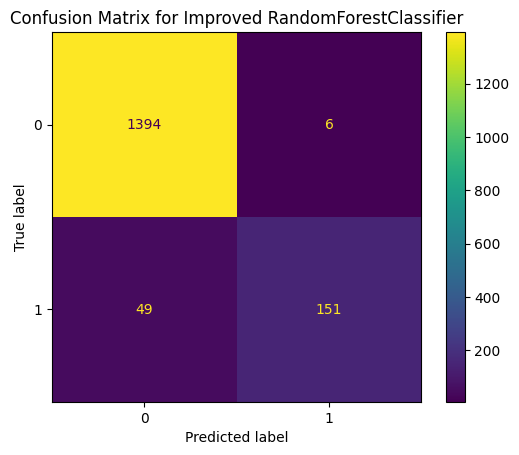

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming rfcopt and X_test, y_test are defined

# Make predictions on the test set with your improved RandomForestClassifier
rfcopt_predict = rfcopt.predict(X_test)

# Create a confusion matrix
conf_matrix_rfcopt = confusion_matrix(y_test, rfcopt_predict)

# Display the confusion matrix as a plot
disp_rfcopt = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rfcopt)
disp_rfcopt.plot()
plt.title('Confusion Matrix for Improved RandomForestClassifier')
plt.show()


SVM Accuracy on Test Set: 90.06%
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1400
           1       0.78      0.28      0.42       200

    accuracy                           0.90      1600
   macro avg       0.84      0.64      0.68      1600
weighted avg       0.89      0.90      0.88      1600



In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [31]:
# X_train_scaled, X_test_scaled, y_train, y_test

# Initialize the Logistic Regression classifier
log_reg = LogisticRegression(random_state=42)

# Train the classifier on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
log_reg_predictions = log_reg.predict(X_test)

# Calculate the accuracy of the classifier on the test data
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
# Print the accuracy of the classifier
print(f"Logistic Regression Accuracy on Test Set: {log_reg_accuracy:.2%}")

# Print the classification report to get additional performance metrics
print(classification_report(y_test, log_reg_predictions))

Logistic Regression Accuracy on Test Set: 89.50%
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1400
           1       0.73      0.26      0.38       200

    accuracy                           0.90      1600
   macro avg       0.82      0.62      0.66      1600
weighted avg       0.88      0.90      0.87      1600



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


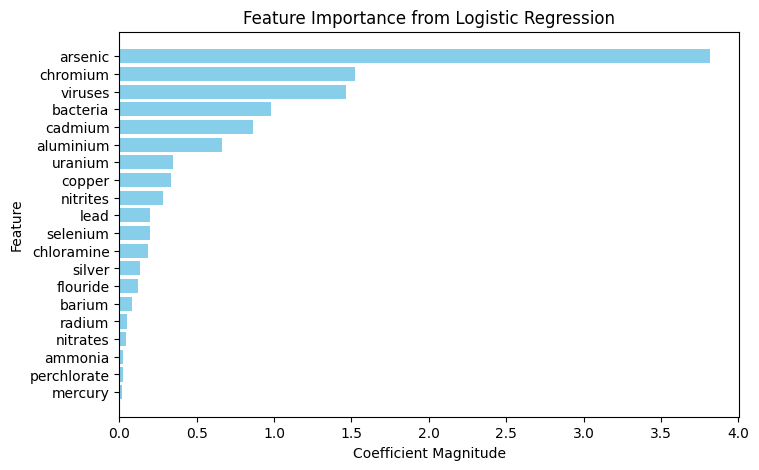

In [33]:
import matplotlib.pyplot as plt

# Retrieving coefficients from the trained model
log_reg_coefs = log_reg.coef_[0]

# Focusing on the magnitude of coefficients to determine importance
importances = np.abs(log_reg_coefs)

# Sort the importances
sorted_indices = np.argsort(importances)

# Plotting the importances
plt.figure(figsize=(8, 5))
plt.title("Feature Importance from Logistic Regression")
plt.barh(range(len(sorted_indices)), importances[sorted_indices], color='skyblue', align='center')
plt.yticks(range(len(sorted_indices)), np.array(feature_names)[sorted_indices]) # Replace feature_names with actual names if available
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.show()

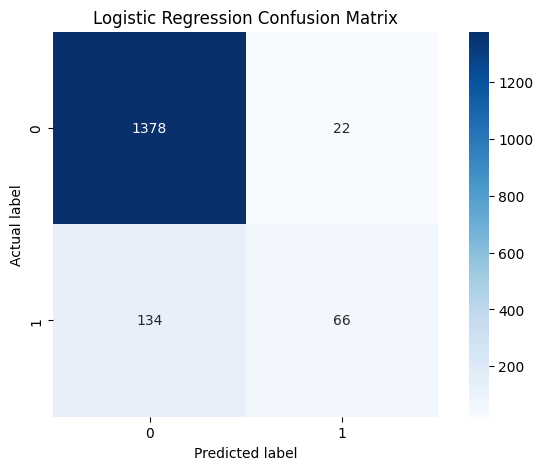

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix for Logistic Regression
log_reg_cm = confusion_matrix(y_test, log_reg_predictions)
unique_labels = np.unique(y_test) # Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 5))
sns.heatmap(log_reg_cm, annot=True, fmt='d', cmap="Blues", square=True,
            xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
# Scale the features (SVMs are sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize the Support Vector Classifier
svm_clf = SVC(kernel='linear', random_state=42)

# Train the classifier on the training data
svm_clf.fit(X_train_scaled, y_train)

# Make predictions on the test data
svm_predictions = svm_clf.predict(X_test_scaled)

# Calculate the accuracy of the classifier on the test data
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Print the accuracy of the classifier
print(f"SVM Accuracy on Test Set: {svm_accuracy:.2%}")

# Print the classification report for detailed statistics
print(classification_report(y_test, svm_predictions))
from sklearn.model_selection import GridSearchCV

# Set the hyperparameters search grid
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'kernel': ['linear', 'rbf', 'poly']
}

# Set up the grid search with cross-validation
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=3, verbose=1, n_jobs=-1)

# Fit grid search on the scaled training data
grid_search_svm.fit(X_train_scaled, y_train)

# Get the best estimator
best_svm_clf = grid_search_svm.best_estimator_

# Make predictions using the best model
best_svm_predictions = best_svm_clf.predict(X_test_scaled)

# Calculate the accuracy of the best classifier on the test data
best_svm_accuracy = accuracy_score(y_test, best_svm_predictions)

# Print the accuracy
print(f"Best SVM Accuracy on Test Set: {best_svm_accuracy:.2%}")

# Print the best parameters found
print("Best parameters found for SVM:", grid_search_svm.best_params_)

# Print the classification report
print(classification_report(y_test, best_svm_predictions))
# Generate the confusion matrix for SVM
svm_cm = confusion_matrix(y_test, best_svm_predictions)
# Plot confusion matrix for SVC
plt.figure(figsize=(9, 7))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap="Blues", square=True,
           xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('SVC Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()